<a href="https://colab.research.google.com/github/hbisgin/datamining/blob/main/SkitlearnIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.decomposition import PCA

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)
principal_components.shape

(150, 4)


(150, 2)

   Principal Component 1  Principal Component 2  Target
0              -2.264703               0.480027       0
1              -2.080961              -0.674134       0
2              -2.364229              -0.341908       0
3              -2.299384              -0.597395       0
4              -2.389842               0.646835       0


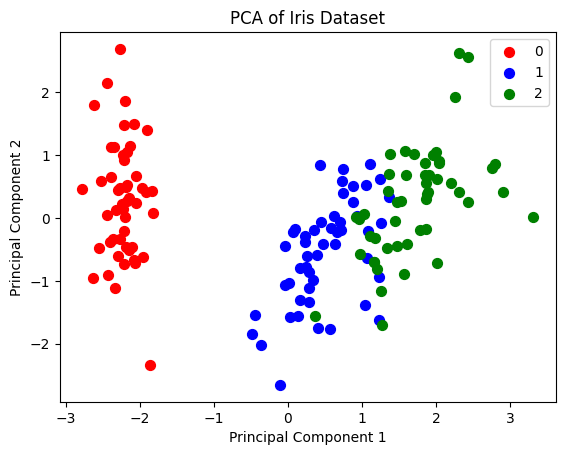

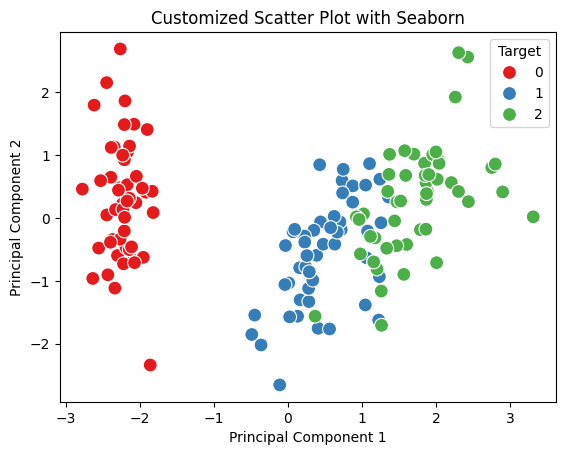

In [4]:


# Create a DataFrame for visualization
data = np.column_stack((principal_components, y))
columns = ['Principal Component 1', 'Principal Component 2', 'Target']
df = pd.DataFrame(data, columns=columns)
df['Target'] = df['Target'].astype(int)
print(df.head())

# Visualize the results
fig, ax = plt.subplots()
colors = ['red', 'blue', 'green']
targets = [0, 1, 2]

for target, color in zip(targets, colors):
    indices_to_keep = df['Target'] == target
    ax.scatter(df.loc[indices_to_keep, 'Principal Component 1'],
               df.loc[indices_to_keep, 'Principal Component 2'],
               c=color,
               s=50)

ax.legend(targets)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Iris Dataset')

plt.show()

sn.scatterplot(data=df, x='Principal Component 1', y='Principal Component 2', hue = 'Target', palette='Set1', s=100)
plt.title('Customized Scatter Plot with Seaborn')
plt.show()



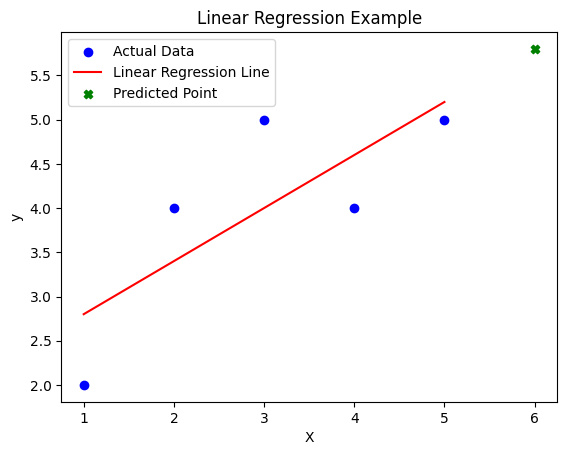

Slope (Coefficient): 0.6
Intercept: 2.2


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Predictor variable
y = np.array([2, 4, 5, 4, 5])  # Target variable

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make predictions
X_new = np.array([6]).reshape(-1, 1)  # New data point for prediction
y_pred = model.predict(X_new)

# Plot the data and the linear regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression Line')
plt.scatter(X_new, y_pred, color='green', marker='X', label='Predicted Point')

plt.title('Linear Regression Example')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print the slope and intercept of the regression line
print(f"Slope (Coefficient): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


In [6]:
mtcars = pd.read_csv('/content/drive/MyDrive/DATA/mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


(32, 1)


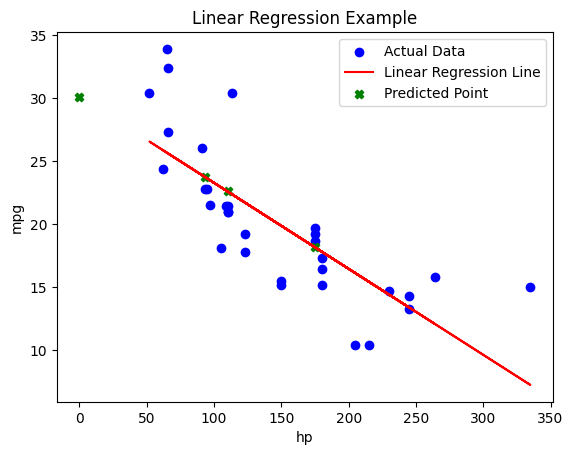

Slope (Coefficient): -0.06822827807156365
Intercept: 30.098860539622496


In [7]:
# Create a linear regression model
model = LinearRegression()

X = mtcars['hp'].values.reshape(-1, 1)
print(X.shape)
y = mtcars['mpg']
# Train the model
model.fit(X, y)

# Make predictions
X_new = np.array([93, 110, 175, 0]).reshape(-1, 1)  # New data point for prediction
y_pred = model.predict(X_new)


# Plot the data and the linear regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression Line')
plt.scatter(X_new, y_pred, color='green', marker='X', label='Predicted Point')

plt.title('Linear Regression Example')
plt.xlabel('hp')
plt.ylabel('mpg')
plt.legend()
plt.show()

# Print the slope and intercept of the regression line
print(f"Slope (Coefficient): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

(32, 2)
(32,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


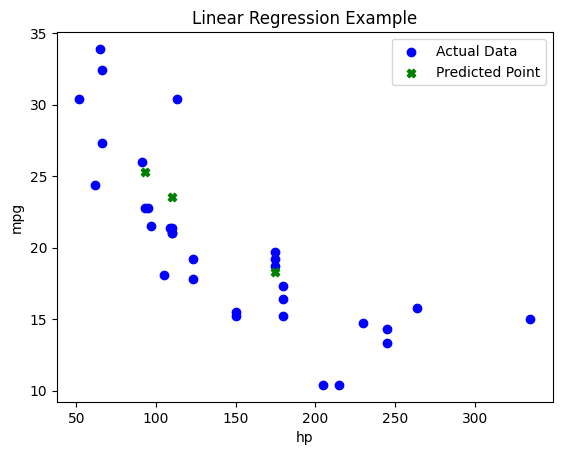

Slope (Coefficient): -0.03177294698216098
Intercept: 37.227270116447194


In [8]:
# Create a linear regression model
model = LinearRegression()
mtcars = mtcars.sort_values(by='hp', ascending=True)

X = mtcars[['hp', 'wt']]
print(X.shape)
y = mtcars['mpg']
# Train the model
model.fit(X, y)
print(y.shape)


# Make predictions
X_new =  np.array([ [110, 2.620], [93,2.320], [175, 3.440] ])  # New data point for prediction
y_pred = model.predict(X_new)


# Plot the data and the linear regression line
plt.scatter(mtcars['hp'], y, color='blue', label='Actual Data')
#plt.plot(X.iloc[:,0], model.predict(X), color='red', label='Linear Regression Line')
plt.scatter(X_new[:,0], y_pred, color='green', marker='X', label='Predicted Point')

plt.title('Linear Regression Example')
plt.xlabel('hp')
plt.ylabel('mpg')
plt.legend()
plt.show()

# Print the slope and intercept of the regression line
print(f"Slope (Coefficient): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

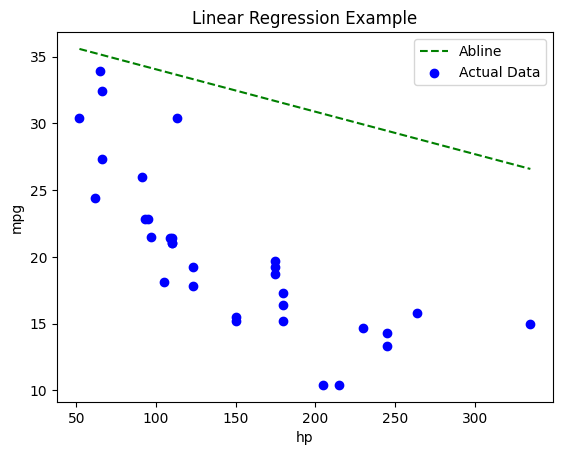

In [9]:
import matplotlib.pyplot as plt

# Assuming 'mtcars' is your DataFrame
# Selecting features and target variable
X = mtcars[[ 'hp',  'wt']]
y = mtcars['mpg']  # Assuming you want to predict 'mpg'

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Visualize the linear regression line

abline_coef1 = model.coef_[0]  # Slope of the regression line
abline_coef2 = model.coef_[1]
abline_intercept = model.intercept_  # Intercept of the regression line
abline_values = abline_coef1 * mtcars['hp'] + abline_intercept
plt.plot(mtcars['hp'], abline_values, '--', color='green', label='Abline')
plt.scatter(mtcars['hp'], y, color='blue', label='Actual Data')
#plt.plot(mtcars['hp'], model.predict(X), color='red', label='Linear Regression Line')

plt.title('Linear Regression Example')
plt.xlabel('hp')
plt.ylabel('mpg')
plt.legend()
plt.show()



**Machine Learning Example with Decision Tree**

In [10]:
diabetes = pd.read_csv('/content/drive/MyDrive/DATA/diabetes_train.csv')
print(diabetes.shape)
diabetes.head()

(758, 9)


,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [11]:
diabetes_test = pd.read_csv('/content/drive/MyDrive/DATA/diabetes_test.csv')
print(diabetes_test.shape)
diabetes_test.head()

(10, 9)


,preg,plas,pres,skin,insu,mass,pedi,age,class
0,1,106,76,0,0,37.5,0.197,26,tested_negative
1,6,190,92,0,0,35.5,0.278,66,tested_positive
2,2,88,58,26,16,28.4,0.766,22,tested_negative
3,9,170,74,31,0,44.0,0.403,43,tested_positive
4,9,89,62,0,0,22.5,0.142,33,tested_negative


In [12]:
from sklearn import tree #machine learning library
clf = tree.DecisionTreeClassifier() #create the clf object with options you wanna work with
clf = clf.fit(diabetes.iloc[:,0:8], diabetes['class']) #first paramater data, second labels

Let's visualize the tree we got

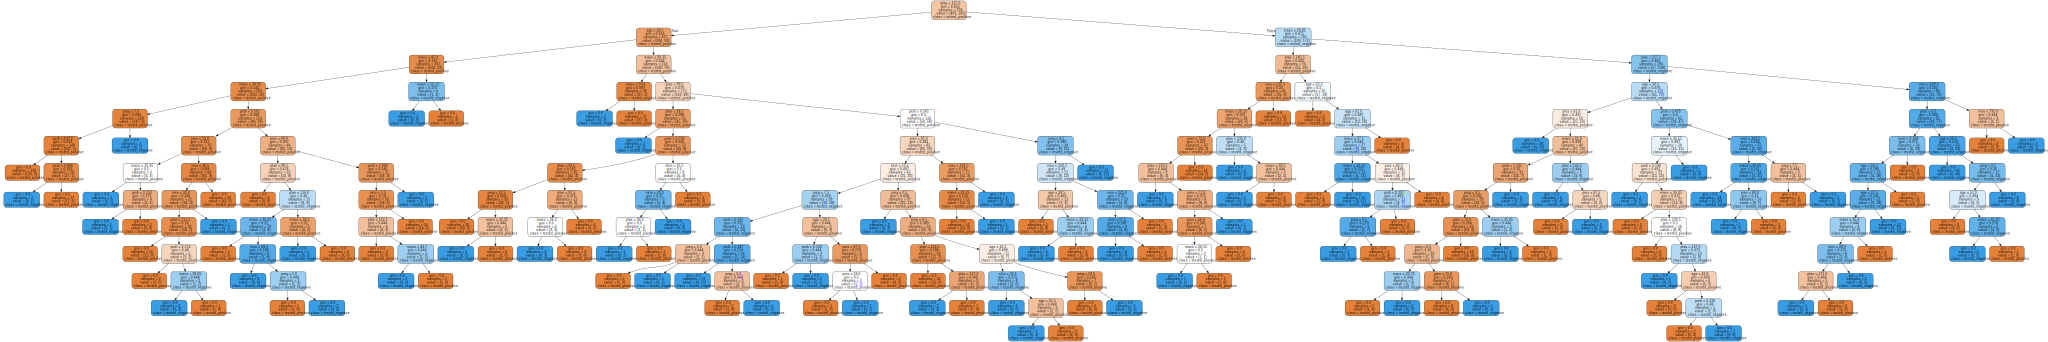

In [13]:
import graphviz #this part is just for visualization
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=diabetes.columns[:8],
                     class_names=diabetes['class'],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

You can save it if you want

In [14]:

graph.render("/content/drive/My Drive/TEACHING/CSC_487_587/data/diabetes_train_tree")

'/content/drive/My Drive/TEACHING/CSC_487_587/data/diabetes_train_tree.pdf'

Let's test our model on the test set

In [15]:
y_predict = clf.predict(diabetes_test.iloc[:,0:8])
print(y_predict.shape)
y_predict

(10,)


array(['tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_negative'], dtype=object)

Let's see how well we did

In [16]:
from sklearn.metrics import confusion_matrix #let's see how good we did
tn, fp, fn, tp = confusion_matrix(diabetes_test['class'], y_predict).ravel()
tn, fp, fn, tp
print(f'TN: {tn} FP: {fp} FN: {fn} TP: {tp}')

TN: 7 FP: 0 FN: 1 TP: 2


KNN Example

In [24]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

classifier will be used to fit a model on our data

In [27]:
clf = clf.fit(diabetes.iloc[:,0:8], diabetes['class']) #first parameter data, second labels
y_pred = clf.predict(diabetes_test.iloc[:,0:8]) #doing prediction on unknown test set
print(y_pred)

['tested_negative' 'tested_negative' 'tested_negative' 'tested_positive'
 'tested_negative' 'tested_positive' 'tested_positive' 'tested_negative'
 'tested_positive' 'tested_negative']


In [28]:
tn, fp, fn, tp = confusion_matrix(diabetes_test['class'], y_predict).ravel()
tn, fp, fn, tp
print(f'TN: {tn} FP: {fp} FN: {fn} TP: {tp}')

TN: 7 FP: 0 FN: 1 TP: 2
